In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
with open('../data/teis_final_data.pickle', 'rb') as file:
    teis_merge2 = pickle.load(file)

In [3]:
teis_merge2

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
0,104085,2007-07-07,2018-01-20,3850 days,DCS,Notification,Unable to contact,2010-01-25,933 days,NaN,...,GN,Davidson,Competitive,Middle,2017-2018,2017.0,Jan,3.0,2018,I
1,350065,2013-10-15,2016-08-17,1037 days,PCP,Screening,Unable to contact,2016-08-31,1051 days,Steven Scarlett,...,UC,Jackson,At-Risk,Middle,2016-2017,2016.0,Aug,1.0,2016,I
2,351755,2013-11-13,2016-07-12,972 days,Parent,Eligibility,Ineligible for Part C,2016-08-25,1016 days,Rene Bard,...,NW,Madison,Transitional,Western,2016-2017,2016.0,Jul,1.0,2016,I
3,353800,2013-10-01,2016-09-14,1079 days,Parent,Notification,Referral less than 45 days,2016-09-15,1080 days,Jennifer Terranera - 45 days,...,FT,Hawkins,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
4,353805,2013-12-04,2016-08-05,975 days,Dept. of Health,IFSP,618 - Part B eligibility not determined,2016-12-03,1095 days,Anna Bolin,...,UC,Putnam,Transitional,Middle,2016-2017,2016.0,Aug,1.0,2016,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2020-05-20,2022-07-01,772 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115520,531593,2021-12-07,2022-07-01,206 days,PCP,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A
115521,531594,2022-06-21,2022-07-01,10 days,Other Health Care Provider,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Montgomery,Transitional,NaN,NaN,NaN,NaN,NaN,2022,A
115522,531595,2022-06-17,2022-07-01,14 days,Hospital,Notification,NaN,NaT,NaT,Kim Correll,...,GN,Davidson,Competitive,NaN,NaN,NaN,NaN,NaN,2022,A


### Bullet 5
TEIS provides services to eligible infants and toddlers from birth to age 3 (for this question, only consider cases which have reached the IFSP phase).

    -Are there any POE or service coordinators with high rates of early closure (a child exiting before reaching age 3)? 


In [4]:
ifsp = teis_merge2.loc[teis_merge2['Child Phase'] == 'IFSP']
ifsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45518 entries, 4 to 114363
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   45518 non-null  int64          
 1   DOB                        45518 non-null  datetime64[ns] 
 2   Notification Date          45518 non-null  datetime64[ns] 
 3   Referral Age               45518 non-null  timedelta64[ns]
 4   Referral Source Type Name  45518 non-null  object         
 5   Child Phase                45518 non-null  object         
 6   Exit Reason                36052 non-null  object         
 7   Exit Date                  36039 non-null  datetime64[ns] 
 8   Exit Age                   36039 non-null  timedelta64[ns]
 9   Service Coordinator        45518 non-null  object         
 10  Parent Consent             45474 non-null  datetime64[ns] 
 11  Initial Eligibility        45518 non-null  object    

In [5]:
ifsp_exit = ifsp.dropna(subset=['Exit Date'])
ifsp_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36039 entries, 4 to 113003
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   36039 non-null  int64          
 1   DOB                        36039 non-null  datetime64[ns] 
 2   Notification Date          36039 non-null  datetime64[ns] 
 3   Referral Age               36039 non-null  timedelta64[ns]
 4   Referral Source Type Name  36039 non-null  object         
 5   Child Phase                36039 non-null  object         
 6   Exit Reason                36039 non-null  object         
 7   Exit Date                  36039 non-null  datetime64[ns] 
 8   Exit Age                   36039 non-null  timedelta64[ns]
 9   Service Coordinator        36039 non-null  object         
 10  Parent Consent             36006 non-null  datetime64[ns] 
 11  Initial Eligibility        36039 non-null  object    

In [6]:
ifsp_exit = ifsp_exit.loc[ifsp_exit['Referral Age'] > '0 days']
ifsp_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36039 entries, 4 to 113003
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   Child ID                   36039 non-null  int64          
 1   DOB                        36039 non-null  datetime64[ns] 
 2   Notification Date          36039 non-null  datetime64[ns] 
 3   Referral Age               36039 non-null  timedelta64[ns]
 4   Referral Source Type Name  36039 non-null  object         
 5   Child Phase                36039 non-null  object         
 6   Exit Reason                36039 non-null  object         
 7   Exit Date                  36039 non-null  datetime64[ns] 
 8   Exit Age                   36039 non-null  timedelta64[ns]
 9   Service Coordinator        36039 non-null  object         
 10  Parent Consent             36006 non-null  datetime64[ns] 
 11  Initial Eligibility        36039 non-null  object    

In [7]:
all_early_exits = ifsp_exit.loc[ifsp_exit['Exit Age'] < '1092 days']
all_early_exits

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,ET,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I
52,364743,2014-03-13,2016-07-06,846 days,Parent,IFSP,618 - Parent withdraw,2016-07-08,848 days,Jennifer Johnson,...,GN,Davidson,Competitive,Middle,2016-2017,2016.0,Jul,1.0,2016,I
57,365848,2014-04-03,2016-09-08,889 days,Hospital,IFSP,618 - Attempts to contact unsuccessful,2016-10-12,923 days,Cathy Taylor,...,ET,Morgan,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
67,368391,2014-06-15,2016-08-23,800 days,DCS,IFSP,618 - Attempts to contact unsuccessful,2017-05-23,1073 days,Elizabeth Hailey,...,SW,Madison,Transitional,Western,2016-2017,2016.0,Aug,1.0,2016,I
107,379122,2014-05-02,2017-02-13,1018 days,PCP,IFSP,618 - Parent withdraw,2017-04-19,1083 days,Anna Bolin,...,UC,White,Transitional,Middle,2016-2017,2016.0,Feb,3.0,2017,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112126,527606,2021-12-09,2022-04-27,139 days,PCP,IFSP,618 - Moved out of state,2022-06-27,200 days,Kelly Holt,...,SC,Rutherford,Competitive,Middle,2021-2022,2021.0,Apr,4.0,2022,I
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,MD,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,SC,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,MD,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I


In [8]:
early_exits = all_early_exits.loc[~all_early_exits['Exit Reason'].isin(['618 - Completion of IFSP/ no longer requires services',
                                                                      '618 - Moved out of state', '618 - Deceased'])]
early_exits

,Child ID,DOB,Notification Date,Referral Age,Referral Source Type Name,Child Phase,Exit Reason,Exit Date,Exit Age,Service Coordinator,...,POE,County Name,County SES,Tenn Region,Fiscal Year,Fiscal Year.1,Notification Month,Qtr,Notification Year,Active
8,354276,2013-12-24,2016-08-04,954 days,DCS,IFSP,618 - Parent withdraw,2016-09-22,1003 days,Kristi Borer,...,ET,Blount,Transitional,Eastern,2016-2017,2016.0,Aug,1.0,2016,I
52,364743,2014-03-13,2016-07-06,846 days,Parent,IFSP,618 - Parent withdraw,2016-07-08,848 days,Jennifer Johnson,...,GN,Davidson,Competitive,Middle,2016-2017,2016.0,Jul,1.0,2016,I
57,365848,2014-04-03,2016-09-08,889 days,Hospital,IFSP,618 - Attempts to contact unsuccessful,2016-10-12,923 days,Cathy Taylor,...,ET,Morgan,At-Risk,Eastern,2016-2017,2016.0,Sep,1.0,2016,I
67,368391,2014-06-15,2016-08-23,800 days,DCS,IFSP,618 - Attempts to contact unsuccessful,2017-05-23,1073 days,Elizabeth Hailey,...,SW,Madison,Transitional,Western,2016-2017,2016.0,Aug,1.0,2016,I
107,379122,2014-05-02,2017-02-13,1018 days,PCP,IFSP,618 - Parent withdraw,2017-04-19,1083 days,Anna Bolin,...,UC,White,Transitional,Middle,2016-2017,2016.0,Feb,3.0,2017,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111980,527434,2020-01-10,2022-04-25,836 days,PCP,IFSP,618 - Parent withdraw,2022-06-09,881 days,Diane Brewington,...,UC,Macon,Transitional,Middle,2021-2022,2021.0,Apr,4.0,2022,I
112129,527609,2019-08-26,2022-04-27,975 days,Parent,IFSP,618 - Parent withdraw,2022-06-13,1022 days,Torkwase Smith,...,MD,Shelby,Transitional,Western,2021-2022,2021.0,Apr,4.0,2022,I
112174,527688,2020-04-24,2022-04-28,734 days,PCP,IFSP,618 - Parent withdraw,2022-06-08,775 days,Brittney Blalock Rose,...,SC,Williamson,Attainment,Middle,2021-2022,2021.0,Apr,4.0,2022,I
112689,528318,2021-09-26,2022-05-09,225 days,PCP,IFSP,618 - Attempts to contact unsuccessful,2022-07-01,278 days,Marian Kingery,...,MD,Shelby,Transitional,Western,2021-2022,2021.0,May,4.0,2022,I


In [9]:
POE_exits = ifsp_exit.groupby('POE')['Child ID'].count()
POE_exits = POE_exits.to_frame().reset_index()
POE_exits = POE_exits.rename(columns = {'Child ID' : 'Total Exits'})
POE_exits

,POE,Total Exits
0,ET,5920
1,FT,3749
2,GN,5890
3,MD,4847
4,NW,1701
5,SC,5544
6,SE,2722
7,SW,2050
8,UC,3616


In [10]:
POE_early_exits = early_exits.groupby('POE')['Child ID'].count()
POE_early_exits = POE_early_exits.to_frame().reset_index()
POE_early_exits = POE_early_exits.rename(columns = {'Child ID' : 'Total Early Exits'})
POE_early_exits

,POE,Total Early Exits
0,ET,2389
1,FT,1434
2,GN,1849
3,MD,1785
4,NW,763
5,SC,1871
6,SE,989
7,SW,1062
8,UC,1426


In [11]:
POE_early_exit_rate = pd.merge(POE_exits, POE_early_exits)
POE_early_exit_rate['Early Exit Rate'] = round((POE_early_exit_rate['Total Early Exits']/
                                                POE_early_exit_rate['Total Exits'])*100, 2)
POE_early_exit_rate = POE_early_exit_rate.sort_values('Early Exit Rate')
POE_early_exit_rate

,POE,Total Exits,Total Early Exits,Early Exit Rate
2,GN,5890,1849,31.39
5,SC,5544,1871,33.75
6,SE,2722,989,36.33
3,MD,4847,1785,36.83
1,FT,3749,1434,38.25
8,UC,3616,1426,39.44
0,ET,5920,2389,40.35
4,NW,1701,763,44.86
7,SW,2050,1062,51.80


In [12]:
POE_early_exit_rate['Total Early Exits'].sum()/POE_early_exit_rate['Total Exits'].sum()

0.3764810344349177

In [13]:
full_palette = ["#D9ED92", "#B5E48C", "#99D98C", "#76C893", "#52B69A", "#34A0A4", "#168AAD", "#1A759F", "#1E6091", "#184E77"]

main_palette = ["#76C893", "#1E6091"]

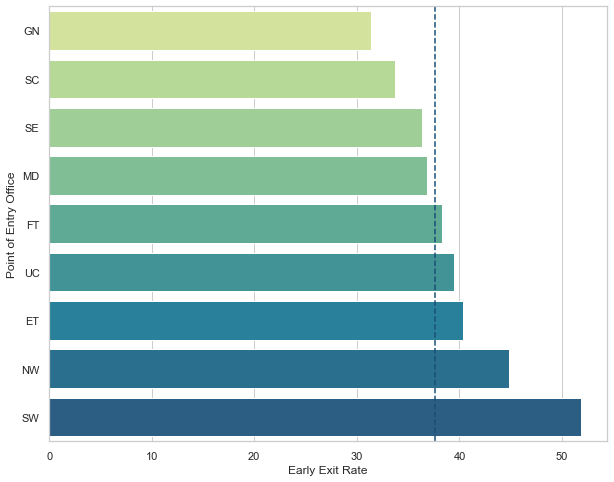

In [14]:
sns.set_theme(style="whitegrid")
eepoe = sns.barplot(x="Early Exit Rate", y="POE", data = POE_early_exit_rate, palette=full_palette)
plt.xlabel("Early Exit Rate")
plt.ylabel("Point of Entry Office")
eepoe.figure.set_size_inches(10, 8)
eepoe.axvline(37.65, linestyle = '--', color='#184E77');
#plt.savefig('../data/eepoe.png', transparent=True)

In [15]:
POE_svc_early_exits = early_exits.groupby(['POE', 'Service Coordinator'])['Child ID'].count()
POE_svc_early_exits = POE_svc_early_exits.to_frame().reset_index()
POE_svc_early_exits = POE_svc_early_exits.rename(columns = {'Child ID' : 'Total Early Exits'})
POE_svc_early_exits

,POE,Service Coordinator,Total Early Exits
0,ET,Aaron Collins,68
1,ET,Adrianne McPeake,37
2,ET,Amanda Blair,19
3,ET,Amanda Cooke,53
4,ET,Amanda Cooke - PC,3
...,...,...,...
310,UC,Nicole Smith,80
311,UC,Sherry Roberts-DS,2
312,UC,Steven Scarlett,132
313,UC,Taylor Lee,80


In [16]:
POE_svc_exits = ifsp_exit.groupby(['POE', 'Service Coordinator'])['Child ID'].count()
POE_svc_exits = POE_svc_exits.to_frame().reset_index()
POE_svc_exits = POE_svc_exits.rename(columns = {'Child ID' : 'Total Exits'})
POE_svc_exits = POE_svc_exits.loc[POE_svc_exits['Total Exits'] > 3]
POE_svc_exits

,POE,Service Coordinator,Total Exits
0,ET,Aaron Collins,153
1,ET,Adrianne McPeake,71
2,ET,Amanda Blair,30
3,ET,Amanda Cooke,112
4,ET,Amanda Cooke - PC,5
...,...,...,...
329,UC,Miriam Espinosa,272
330,UC,Nicole Smith,255
332,UC,Steven Scarlett,277
333,UC,Taylor Lee,271


In [17]:
POE_svc_exits['Service Coordinator'].value_counts()

Brittany Smith        2
Taylor Watson         2
Cecile Buchanan       2
Anna Bolin            2
Andrea Smith          1
                     ..
Lizzie Ristucci       1
Londa Walker          1
Marcia Jordan         1
Marguarite Stewart    1
Taylor Lee            1
Name: Service Coordinator, Length: 289, dtype: int64

In [18]:
POE_svc_early_exit_rate = pd.merge(POE_svc_exits, POE_svc_early_exits,  how='left')
POE_svc_early_exit_rate['Early Exit Rate'] = round((POE_svc_early_exit_rate['Total Early Exits']/
                                                POE_svc_early_exit_rate['Total Exits'])*100, 2)
POE_svc_early_exit_rate = POE_svc_early_exit_rate.fillna(0)
POE_svc_early_exit_rate.sort_values('Early Exit Rate', ascending=False)

,POE,Service Coordinator,Total Exits,Total Early Exits,Early Exit Rate
122,GN,Taylor Watson,4,4.0,100.00
153,MD,JoAnn Hinkle-DA,11,11.0,100.00
26,ET,Kaitlin Lippert,9,8.0,88.89
161,MD,Lamar Meaders,8,7.0,87.50
166,MD,Marian Kingery,55,48.0,87.27
...,...,...,...,...,...
66,FT,Kimberly KetronPC,23,1.0,4.35
27,ET,Karen Stock,4,0.0,0.00
42,ET,Signal Centers-EEA,5,0.0,0.00
244,SE,Holly Wilson,6,0.0,0.00


In [19]:
UC_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'UC'].nlargest(5, 'Early Exit Rate')
FT_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'FT'].nlargest(5, 'Early Exit Rate')
NW_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'NW'].nlargest(5, 'Early Exit Rate')
ET_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'ET'].nlargest(5, 'Early Exit Rate')
GN_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'GN'].nlargest(5, 'Early Exit Rate')
SW_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'SW'].nlargest(5, 'Early Exit Rate')
SE_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'SE'].nlargest(5, 'Early Exit Rate')
SC_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'SC'].nlargest(5, 'Early Exit Rate')
MD_early_exits = POE_svc_early_exit_rate.loc[POE_svc_early_exit_rate['POE'] == 'MD'].nlargest(5, 'Early Exit Rate')
POE_svc_high_ee = pd.concat([UC_early_exits, FT_early_exits, NW_early_exits, ET_early_exits, GN_early_exits,
                              SW_early_exits, SE_early_exits, SC_early_exits, MD_early_exits])
POE_svc_high_ee

,POE,Service Coordinator,Total Exits,Total Early Exits,Early Exit Rate
292,UC,Taylor Watson,73,43.0,58.90
284,UC,Heather Craig,244,134.0,54.92
277,UC,A.J. Cowan,59,29.0,49.15
278,UC,Anna Bolin,251,121.0,48.21
290,UC,Steven Scarlett,277,132.0,47.65
75,FT,Regina Bowman,11,8.0,72.73
67,FT,Kristi Morelock,78,52.0,66.67
74,FT,Rebecca Taylor,86,54.0,62.79
77,FT,Susan St. Lawrence,10,6.0,60.00
53,FT,Amanda Royston,61,35.0,57.38


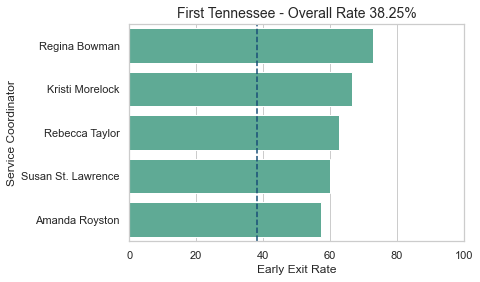

In [20]:
sns.set_theme(style="whitegrid")
heeft = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = FT_early_exits, color='#52B69A')
heeft.axvline(38.25, linestyle = '--', color='#184E77')
plt.title('First Tennessee - Overall Rate 38.25%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heeft.set(xlim=(0, 100))
heeft.figure.set_size_inches(6, 4);
#plt.savefig('../data/heeft.png', bbox_inches = 'tight', transparent=True)

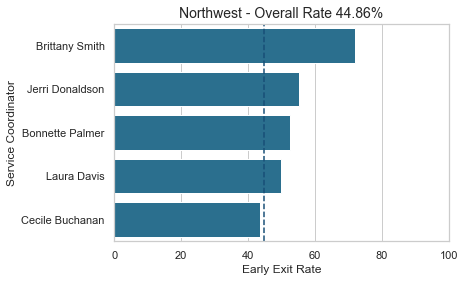

In [21]:
sns.set_theme(style="whitegrid")
heenw = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = NW_early_exits, color='#1A759F')
heenw.axvline(44.86, linestyle = '--', color='#184E77')
plt.title('Northwest - Overall Rate 44.86%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heenw.set(xlim=(0, 100))
heenw.figure.set_size_inches(6, 4);
#plt.savefig('../data/heenw.png', bbox_inches = 'tight', transparent=True)

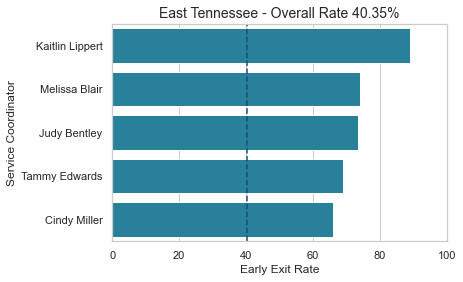

In [22]:
sns.set_theme(style="whitegrid")
heeet = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = ET_early_exits, color='#168AAD')
heeet.axvline(40.35, linestyle = '--', color='#184E77')
plt.title('East Tennessee - Overall Rate 40.35%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heeet.set(xlim=(0, 100))
heeet.figure.set_size_inches(6, 4);
#plt.savefig('../data/heeet.png', bbox_inches = 'tight', transparent=True)

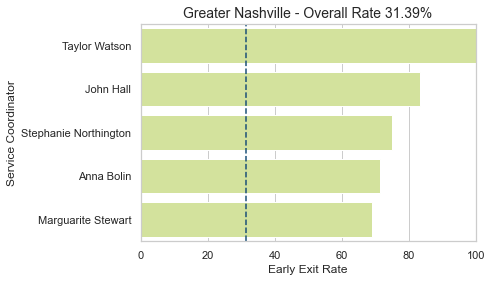

In [23]:
sns.set_theme(style="whitegrid")
heegn = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = GN_early_exits, color='#D9ED92')
heegn.axvline(31.39, linestyle = '--', color='#184E77')
plt.title('Greater Nashville - Overall Rate 31.39%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heegn.set(xlim=(0, 100))
heegn.figure.set_size_inches(6, 4);
#plt.savefig('../data/heegn.png', bbox_inches = 'tight', transparent=True)

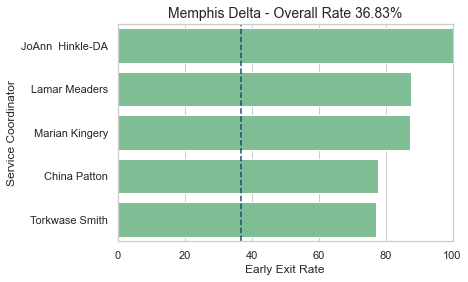

In [24]:
sns.set_theme(style="whitegrid")
heemd = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = MD_early_exits, color='#76C893')
heemd.axvline(36.83, linestyle = '--', color='#184E77')
plt.title('Memphis Delta - Overall Rate 36.83%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heemd.set(xlim=(0, 100))
heemd.figure.set_size_inches(6, 4);
#plt.savefig('../data/heemd.png', bbox_inches = 'tight', transparent=True)

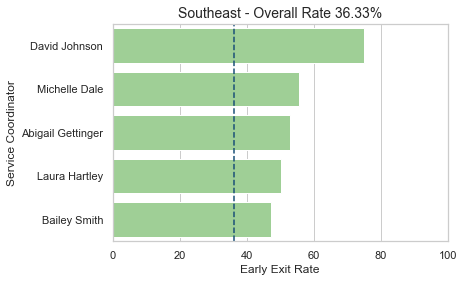

In [25]:
sns.set_theme(style="whitegrid")
heese = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = SE_early_exits, color='#99D98C')
heese.axvline(36.33, linestyle = '--', color='#184E77')
plt.title('Southeast - Overall Rate 36.33%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heese.set(xlim=(0, 100))
heese.figure.set_size_inches(6, 4);
#plt.savefig('../data/heese.png', bbox_inches = 'tight', transparent=True)

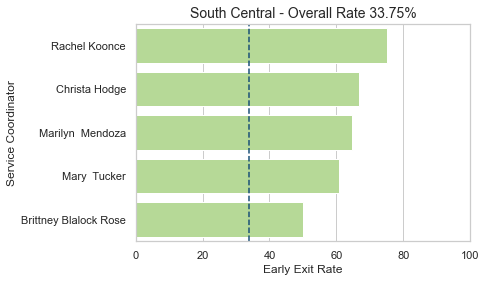

In [26]:
sns.set_theme(style="whitegrid")
heesc = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = SC_early_exits, color='#B5E48C')
heesc.axvline(33.75, linestyle = '--', color='#184E77')
plt.title('South Central - Overall Rate 33.75%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heesc.set(xlim=(0, 100))
heesc.figure.set_size_inches(6, 4);
#plt.savefig('../data/heesc.png', bbox_inches = 'tight', transparent=True)

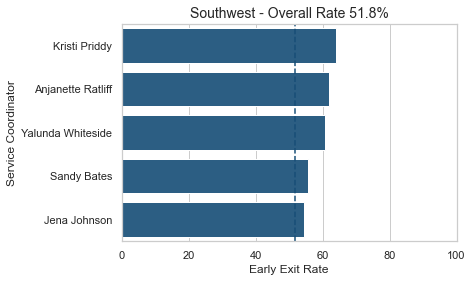

In [27]:
sns.set_theme(style="whitegrid")
heesw = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = SW_early_exits, color='#1E6091')
heesw.axvline(51.8, linestyle = '--', color='#184E77')
plt.title('Southwest - Overall Rate 51.8%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heesw.set(xlim=(0, 100))
heesw.figure.set_size_inches(6, 4);
#plt.savefig('../data/heesw.png', bbox_inches = 'tight', transparent=True)

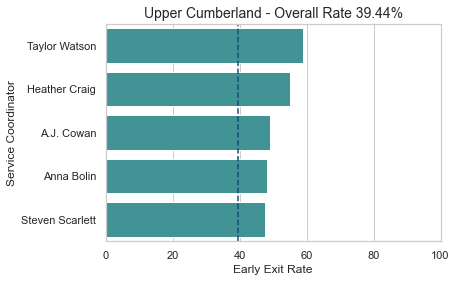

In [28]:
sns.set_theme(style="whitegrid")
heeuc = sns.barplot(x="Early Exit Rate", y="Service Coordinator", data = UC_early_exits, color='#34A0A4')
heeuc.axvline(39.44, linestyle = '--', color='#184E77')
plt.title('Upper Cumberland - Overall Rate 39.44%', fontsize=14)
plt.xlabel("Early Exit Rate")
plt.ylabel("Service Coordinator")
heeuc.set(xlim=(0, 100))
heeuc.figure.set_size_inches(6, 4);
#plt.savefig('../data/heeuc.png', bbox_inches = 'tight', transparent=True)

In [29]:
UC_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'UC') & (POE_svc_early_exit_rate['Early Exit Rate'] > 39.44))]
FT_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'FT') & (POE_svc_early_exit_rate['Early Exit Rate'] > 38.25))]
NW_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'NW') & (POE_svc_early_exit_rate['Early Exit Rate'] > 44.86))]
ET_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'ET') & (POE_svc_early_exit_rate['Early Exit Rate'] > 40.35))]
GN_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'GN') & (POE_svc_early_exit_rate['Early Exit Rate'] > 31.39))]
SW_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'SW') & (POE_svc_early_exit_rate['Early Exit Rate'] > 51.8))]
SE_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'SE') & (POE_svc_early_exit_rate['Early Exit Rate'] > 36.33))]
SC_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'SC') & (POE_svc_early_exit_rate['Early Exit Rate'] > 33.75))]
MD_aa_early_exits = POE_svc_early_exit_rate.loc[((POE_svc_early_exit_rate['POE'] == 'MD') & (POE_svc_early_exit_rate['Early Exit Rate'] > 36.83))]
POE_svc_abavg = pd.concat([UC_aa_early_exits, FT_aa_early_exits, NW_aa_early_exits, ET_aa_early_exits, 
                           GN_aa_early_exits, SW_aa_early_exits, SE_aa_early_exits, SC_aa_early_exits, MD_aa_early_exits])
#POE_svc_abavg

In [30]:
POE_abavg_count = POE_svc_abavg.groupby('POE')['Service Coordinator'].count()
POE_abavg_count = POE_abavg_count.to_frame().reset_index()
POE_abavg_count = POE_abavg_count.rename(columns={'Service Coordinator':'Total Service Coordinators w/ high EER'})
POE_abavg_count

,POE,Total Service Coordinators w/ high EER
0,ET,26
1,FT,14
2,GN,29
3,MD,31
4,NW,4
5,SC,21
6,SE,15
7,SW,6
8,UC,8


In [31]:
POE_svc_abavg.groupby('POE').describe()

Total Exits                                                              \
          count        mean         std   min     25%    50%     75%    max   
POE                                                                           
ET         26.0   93.423077   80.838195   5.0   26.25   73.5  135.25  270.0   
FT         14.0  110.928571   98.443630  10.0   32.00   69.5  197.75  296.0   
GN         29.0  104.137931  118.678655   4.0   14.00   56.0  131.00  415.0   
MD         31.0   60.161290   65.024660   4.0   20.00   39.0   59.00  295.0   
NW          4.0  155.500000   95.129736  25.0  118.75  176.5  213.25  244.0   
SC         21.0  127.523810   99.888247   5.0   31.00   94.0  215.00  294.0   
SE         15.0   94.533333   90.732627   7.0   27.50   79.0  137.50  347.0   
SW          6.0  183.500000  135.460326  11.0   70.50  231.0  264.75  335.0   
UC          8.0  198.625000   89.456993  59.0  138.25  247.5  258.25  277.0   

    Total Early Exits              ...                Early Exit Rate  \
                count        mean  ...     75%    max           count   
POE                                ...                                  
ET               26.0   45.769231  ...   65.75  134.0            26.0   
FT               14.0   51.285714  ...   79.25  145.0            14.0   
GN               29.0   38.793103  ...   56.00  148.0            29.0   
MD               31.0   30.064516  ...   31.00  117.0            31.0   
NW                4.0   83.250000  ...  116.00  128.0             4.0   
SC               21.0   52.523810  ...   88.00  118.0            21.0   
SE               15.0   40.600000  ...   61.50  131.0            15.0   
SW                6.0  107.833333  ...  157.50  214.0             6.0   
UC                8.0   96.125000  ...  127.50  134.0             8.0   

                                                                    
          mean        std    min      25%     50%      75%     max  
POE                                                                 
ET   54.213846  12.535507  40.91  43.5250  50.125  62.4975   88.89  
FT   51.760000  10.928405  39.22  41.6500  49.040  59.3450   72.73  
GN   47.318966  17.566666  31.70  34.8800  38.680  57.1400  100.00  
MD   58.706452  16.968536  36.84  45.5950  51.720  73.0750  100.00  
NW   57.407500   9.954836  50.00  51.8450  53.815  59.3775   72.00  
SC   45.751905  11.847123  33.85  36.9800  40.370  50.0000   75.00  
SE   46.279333   9.660224  37.75  39.2650  44.590  48.9050   75.00  
SW   58.100000   4.691665  52.05  54.8025  58.110  61.5900   63.88  
UC   49.301250   5.087908  44.09  46.1175  47.930  50.5925   58.90  

[9 rows x 24 columns]

In [32]:
POE_svc_exits.groupby('POE').describe()

Total Exits                                                            
          count        mean         std   min     25%    50%     75%    max
POE                                                                        
ET         49.0  120.693878   95.204211   4.0   30.00  110.0  200.00  282.0
FT         30.0  124.566667   93.928690   4.0   27.00  120.5  212.00  296.0
GN         50.0  117.320000  108.804532   4.0   18.00  103.0  161.25  415.0
MD         53.0   91.339623   95.975947   4.0   24.00   56.0  118.00  353.0
NW         12.0  141.750000  105.261687   7.0   24.75  176.5  233.50  260.0
SC         40.0  138.525000  102.024127   5.0   38.50  117.5  246.25  302.0
SE         24.0  113.041667  105.786692   6.0   19.75   88.0  186.00  347.0
SW         19.0  107.736842  113.670011   4.0   15.50   53.0  231.00  335.0
UC         16.0  225.562500   73.824087  59.0  214.25  252.5  271.00  323.0

In [33]:
POE_svc_count = POE_svc_exits.groupby('POE')['Service Coordinator'].count()
POE_svc_count = POE_svc_count.to_frame().reset_index()
POE_svc_count = POE_svc_count.rename(columns={'Service Coordinator':'Total Service Coordinators'})
POE_svc_count

,POE,Total Service Coordinators
0,ET,49
1,FT,30
2,GN,50
3,MD,53
4,NW,12
5,SC,40
6,SE,24
7,SW,19
8,UC,16


In [34]:
POE_aasvc_rate = pd.merge(POE_svc_count, POE_abavg_count)
POE_aasvc_rate['Percent of Service Coordinators with high EE rate'] = round((POE_aasvc_rate['Total Service Coordinators w/ high EER']/
                                                POE_aasvc_rate['Total Service Coordinators'])*100, 2)
POE_aasvc_rate = POE_aasvc_rate.sort_values('Percent of Service Coordinators with high EE rate')
POE_aasvc_rate

,POE,Total Service Coordinators,Total Service Coordinators w/ high EER,Percent of Service Coordinators with high EE rate
7,SW,19,6,31.58
4,NW,12,4,33.33
1,FT,30,14,46.67
8,UC,16,8,50.00
5,SC,40,21,52.50
0,ET,49,26,53.06
2,GN,50,29,58.00
3,MD,53,31,58.49
6,SE,24,15,62.50


In [35]:
POE_aasvc_rate['Total Service Coordinators w/ high EER'].sum() / POE_aasvc_rate['Total Service Coordinators'].sum()

0.5255972696245734